<a href="https://colab.research.google.com/github/shkumar156/Image-Object-Detection-Using-Yolov5/blob/master/CatBreeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"muhammadumar5345","key":"b6b7be391c5aabf603e4d4786aa3f22c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ma7555/cat-breeds-dataset
!unzip cat-breeds-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Tortoiseshell/46495717_25061.jpg  
  inflating: images/Tortoiseshell/46495784_25049.jpg  
  inflating: images/Tortoiseshell/46495794_25052.jpg  
  inflating: images/Tortoiseshell/46496797_24946.jpg  
  inflating: images/Tortoiseshell/46497000_24936.jpg  
  inflating: images/Tortoiseshell/46497664_24825.jpg  
  inflating: images/Tortoiseshell/46500078_24567.jpg  
  inflating: images/Tortoiseshell/46504471_24003.jpg  
  inflating: images/Tortoiseshell/46507777_23590.jpg  
  inflating: images/Tortoiseshell/46510043_23381.jpg  
  inflating: images/Tortoiseshell/46510643_23331.jpg  
  inflating: images/Tortoiseshell/46512081_23194.jpg  
  inflating: images/Tortoiseshell/46513326_23056.jpg  
  inflating: images/Tortoiseshell/46513392_23048.jpg  
  inflating: images/Tortoiseshell/46515915_22642.jpg  
  inflating: images/Tortoiseshell/46518048_22389.jpg  
  inflating: images/Tortoiseshell/46518676_22313.jpg  
  inflating: i

In [2]:
from google.colab import files
files.upload()  # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadumar5345","key":"b6b7be391c5aabf603e4d4786aa3f22c"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ma7555/cat-breeds-dataset
!unzip cat-breeds-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Tortoiseshell/46495717_25061.jpg  
  inflating: images/Tortoiseshell/46495784_25049.jpg  
  inflating: images/Tortoiseshell/46495794_25052.jpg  
  inflating: images/Tortoiseshell/46496797_24946.jpg  
  inflating: images/Tortoiseshell/46497000_24936.jpg  
  inflating: images/Tortoiseshell/46497664_24825.jpg  
  inflating: images/Tortoiseshell/46500078_24567.jpg  
  inflating: images/Tortoiseshell/46504471_24003.jpg  
  inflating: images/Tortoiseshell/46507777_23590.jpg  
  inflating: images/Tortoiseshell/46510043_23381.jpg  
  inflating: images/Tortoiseshell/46510643_23331.jpg  
  inflating: images/Tortoiseshell/46512081_23194.jpg  
  inflating: images/Tortoiseshell/46513326_23056.jpg  
  inflating: images/Tortoiseshell/46513392_23048.jpg  
  inflating: images/Tortoiseshell/46515915_22642.jpg  
  inflating: images/Tortoiseshell/46518048_22389.jpg  
  inflating: images/Tortoiseshell/46518676_22313.jpg  
  inflating: i

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Set path
data_dir = '/content'  # adjust to your dataset folder

# Create train/val split (if needed)
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

# Load data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)
val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

# Create a simple model
model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
model.trainable = False  # freeze pretrained layers

top_model = tf.keras.Sequential([
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

full_model = tf.keras.Sequential([
    model,
    top_model
])

full_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
full_model.fit(train_data, epochs=5, validation_data=val_data)


Found 101286 images belonging to 4 classes.
Found 25321 images belonging to 4 classes.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3166/3166 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9983 - loss: 0.0031

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3166/3166 ━━━━━━━━━━━━━━━━━━━━ 343s 105ms/step - accuracy: 0.9983 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 1.2485e-08
Epoch 2/5
3166/3166 ━━━━━━━━━━━━━━━━━━━━ 321s 101ms/step - accuracy: 1.0000 - loss: 9.1843e-09 - val_accuracy: 1.0000 - val_loss: 4.8021e-10
Epoch 3/5
3166/3166 ━━━━━━━━━━━━━━━━━━━━ 314s 99ms/step - accuracy: 1.0000 - loss: 6.2138e-10 - val_accuracy: 1.0000 - val_loss: 4.7079e-11
Epoch 4/5
3166/3166 ━━━━━━━━━━━━━━━━━━━━ 317s 100ms/step - accuracy: 1.0000 - loss: 2.1348e-10 - val_accuracy: 1.0000 - val_loss: 1.8832e-11
Epoch 5/5
3166/3166 ━━━━━━━━━━━━━━━━━━━━ 340s 107ms/step - accuracy: 1.0000 - loss: 8.9836e-11 - val_accuracy: 1.0000 - val_loss: 1.4124e-11


In [12]:
model.save('my_model.keras')



In [13]:
from google.colab import files
files.download('my_model.keras')  # or .h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
model.save('/content/drive/MyDrive/cat_breed_model.keras')


In [17]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/cat_breed_model.keras')

In [22]:
loss, accuracy = full_model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


792/792 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 1.0000 - loss: 3.6732e-12
Validation Loss: 0.0000
Validation Accuracy: 1.0000


In [23]:
# Convert model
converter = tf.lite.TFLiteConverter.from_keras_model(full_model)
tflite_model = converter.convert()

# Save to file
with open('cat_breed_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted and saved as 'cat_breed_model.tflite'")


Saved artifact at '/tmp/tmpgr98ronk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_798')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139588070221072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139588070222608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139588070225680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139588070225872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139588070225296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139588070227600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139588070226256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139587119989200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139588070227216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139588070225488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1395871199

In [24]:
from google.colab import files
files.download('cat_breed_model.tflite')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
from tensorflow.keras import layers, models, applications
import os

# Load base model (as you likely did)
base_model = applications.MobileNetV2(input_shape=(224, 224, 3),
                                      include_top=False,
                                      weights='imagenet')

base_model.trainable = False  # Freeze if using transfer learning

# Define num_classes using the train_data object
# Assuming train_data is available from a previous cell execution
# If not, you would need to load or define your class names/number of classes differently
if 'train_data' in locals():
    num_classes = train_data.num_classes
else:
    # Fallback: if train_data is not available, you might need to manually set num_classes
    # based on your dataset or load it from a saved configuration.
    # For now, we'll raise an error if train_data is not found to alert the user.
    raise NameError("train_data is not defined. Please run the cell that defines train_data first.")


# Add classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(num_classes, activation='softmax')(x)

# Final model
full_model = models.Model(inputs=base_model.input, outputs=output)
full_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model with your data...
# full_model.fit(train_data, validation_data=val_data, epochs=...)

# Save it
full_model.save('/content/my_model.keras')

In [42]:
output = layers.Dense(num_classes, activation='softmax')(x)


In [43]:
full_model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_17[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [44]:
# Re-save the correct model
full_model.save('/content/my_model.keras')
print("✅ Correct model saved.")


✅ Correct model saved.


✅ Correct model loaded.


Saving getting-to-know-your-bengal-cat-tippaws.webp to getting-to-know-your-bengal-cat-tippaws.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


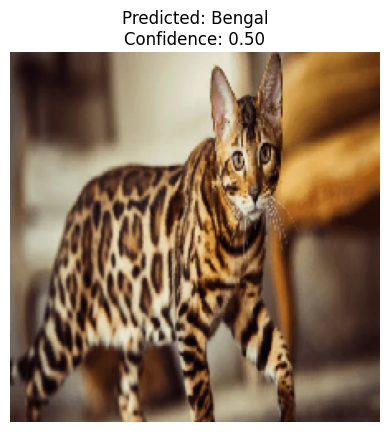

In [73]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load correct model
model_path = '/content/my_model.keras'
full_model = keras.models.load_model(model_path)
print("✅ Correct model loaded.")

# Upload image
uploaded = files.upload()

# Predict
for fname in uploaded.keys():
    img_path = fname
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = full_model.predict(img_array)

    # Fix for output shape
    if prediction.ndim == 2:
        prediction = prediction[0]

    predicted_index = np.argmax(prediction)
    confidence = prediction[predicted_index]

    # Example class names (you can customize)
    class_names = ["Persian", "Siamese", "Bengal", "Maine Coon"]

    predicted_class = class_names[predicted_index]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()
